### ref
```{cpp}
static void calcCovar(std::vector<cv::Vec2f>& points, AnchorPos &anchorPos)
{
	const int num = points.size();

	cv::Mat mat = cv::Mat(num, 2, CV_64FC1);// , & arr);

	//float arr[num][2];
	for (int i = 0; i < num; i++)
	{
		mat.at<double>(i, 0) = points[i][0]; //row index, y
		mat.at<double>(i, 1) = points[i][1]; //arr[i][0] = points[i][1]; //column index, x
	}
	//calculate covariance matrix

	cv::Mat cov, mean;
	cv::calcCovarMatrix(mat, cov, mean, cv::COVAR_NORMAL | cv::COVAR_ROWS);
	cov = cov / (mat.rows - 1);
	//calculate eigen problem
	cv::Mat eigVec = cv::Mat(2, 2, CV_64FC1);
	cv::Mat eigVal = cv::Mat(1, 2, CV_64FC1);
	cv::eigen(cov, eigVal, eigVec);
	// cout << eigVec << endl;
	//calculate the major and minor axes
	double adbg = eigVal.at<double>(0, 0);
	double bdbg = eigVal.at<double>(1, 0);

	anchorPos.cov[0] = sqrt(eigVal.at<double>(0, 0)) * sqrt(1.0);// chisquare_val);
	anchorPos.cov[1] = sqrt(eigVal.at<double>(1, 0)) * sqrt(1.0);// chisquare_val);
	//calcualte the angle.
	anchorPos.cov[2] = atan2(eigVec.at<double>(0, 1), eigVec.at<double>(0, 0));// *180 / M_PI;

	anchorPos.pos[0] = mean.at<double>(0, 0);
	anchorPos.pos[1] = mean.at<double>(0, 1);
	//return cv::RotatedRect(cv::Point2f(mean.at<double>(0, 0), mean.at<double>(0, 1)),
	//	cv::Size2f(alpha, beta), angle);
}
```

- [Proper way of estimating the covariance error ellipse in 2D \- Cross Validated](https://stats.stackexchange.com/questions/361017/proper-way-of-estimating-the-covariance-error-ellipse-in-2d)
- [graphics \- How to draw confidence ellipse from a covariance matrix? \- Mathematica Stack Exchange](https://mathematica.stackexchange.com/questions/81061/how-to-draw-confidence-ellipse-from-a-covariance-matrix)
- [主成分分析と固有値問題 \| Aidemy Premium](https://premium.aidemy.net/magazine/entry/2017/10/19/222941)

In [1]:
from numpy import *
from matplotlib.pyplot import *
from mpl_toolkits.mplot3d import Axes3D

In [22]:
# 3d model
def ellipsoid_model(x, y, param):
    a2 = power(param[0], 2)
    b2 = power(param[1], 2)
    c2 = power(param[2], 2)
    z2 = c2 * (1 - power(x, 2) / a2 - power(y, 2) / b2)
    return sqrt(abs(z2))
#    if (z2 < 0):
#        print(z2)
#    return sqrt(z2)

In [23]:
# 3d dataset
x = linspace(-10, 10, 101)
y = linspace(-10, 10, 101)
gx, gy = meshgrid(x, y)
gz = ellipsoid_model(gx, gy, (1,1,1))

<IPython.core.display.Javascript object>


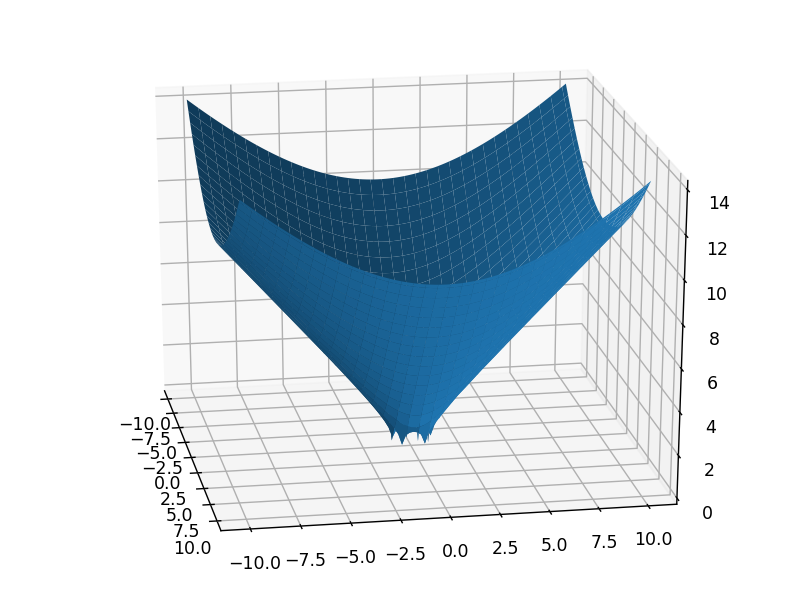

In [24]:
%matplotlib notebook
ax = Axes3D(figure())
ax.plot_surface(gx, gy, gz)
# 失敗

In [28]:
def ellipsoid_param(theta, phi, cnst):
    a = cnst[0]
    b = cnst[1]
    c = cnst[2]
    x = a * sin(theta) * cos(phi)
    y = b * sin(theta) * sin(phi)
    z = c * cos(theta)
    return x, y, z

In [29]:
theta = linspace(0, pi, 20)
phi = linspace(0, 2*pi, 40)
grid = meshgrid(theta, phi)
pointcloud = ellipsoid_param(grid[0], grid[1], (1,1,1))

In [32]:
shape(pointcloud)

(3, 40, 20)

<IPython.core.display.Javascript object>


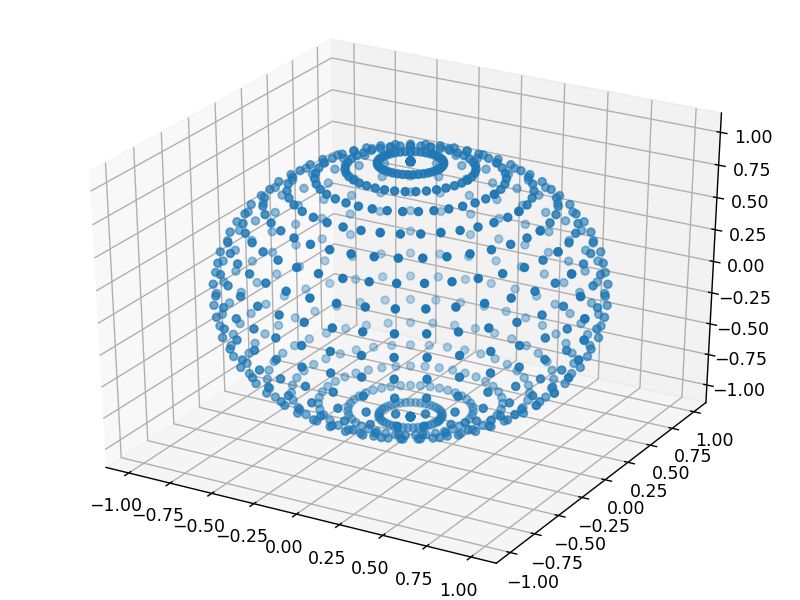

In [40]:
%matplotlib notebook
ax = Axes3D(figure())
ax.scatter3D(pointcloud[0], pointcloud[1], pointcloud[2])
# これだと楕円面上にのみ点が存在する
# 楕円体内にランダムに存在する点群が作りたい

In [2]:
def ellipsoid_rnd_pnts(cnst, length):
    a = cnst[0]
    b = cnst[1]
    c = cnst[2]
    x = random.normal(-a, a, length)
    y = random.normal(-b, b, length)
    z = random.normal(-c, c, length)
    return x, y, z

In [3]:
dataset = ellipsoid_rnd_pnts((1,5,20), 1000)

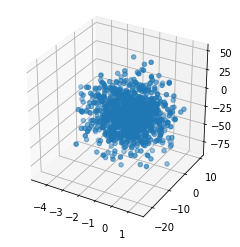

In [6]:
fig = figure()
ax = fig.add_subplot(111, projection='3d')
#ax.set_aspect('equal')
ax.scatter(dataset[0], dataset[1], dataset[2])
ax.set_box_aspect((1,1,1))




